In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rng = np.random.default_rng(1)

In [3]:
n = 100

X = rng.normal(size=n)
eps = rng.normal(size=n, scale=3)

In [4]:
b_0 = 7
b_1 = -5

y = b_0 + b_1 * X + eps

Here we generate some data, using linear regression model:
$$y = \beta_{0} + \beta_{1}X + e$$
$$y = 7-5X + e$$

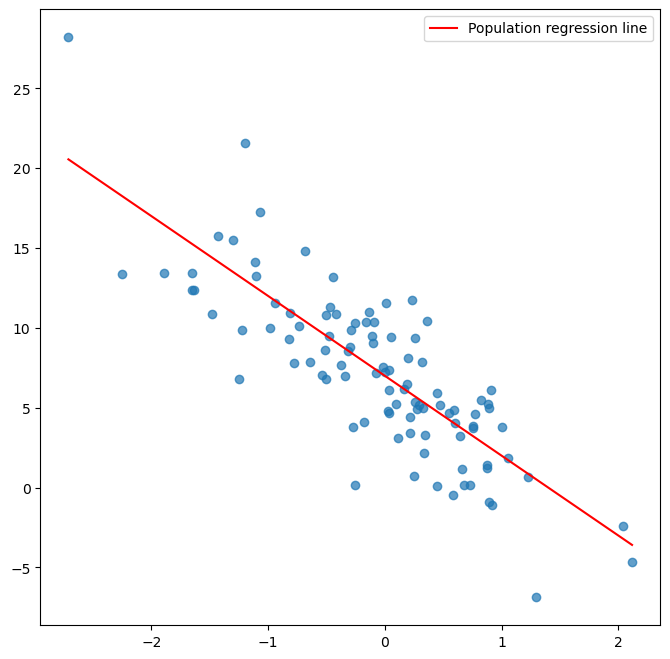

In [5]:
_, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X, y, alpha=0.7)

x_line = np.linspace(X.min(), X.max(), 100)
y_line = b_0 + b_1 * x_line

ax.plot(x_line, y_line, c="r", label="Population regression line")
ax.legend()

And above we see those generated data, and `population regression line` since we know all values of coefficients in the epxression 

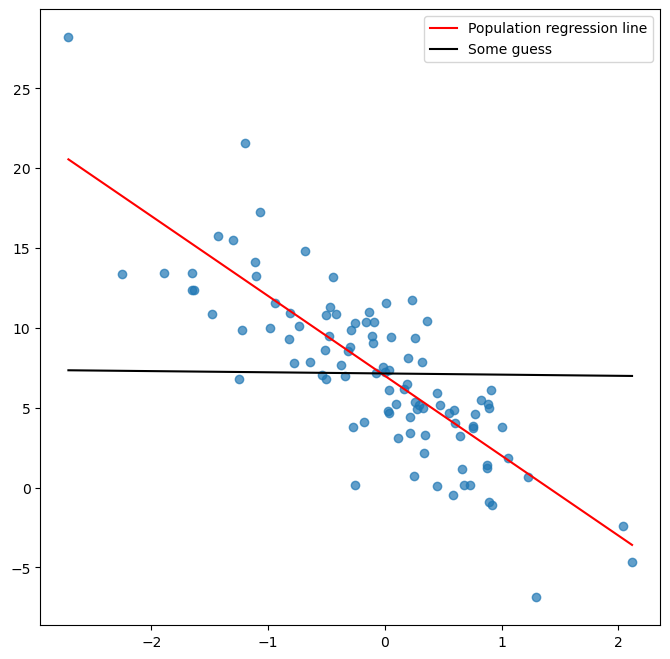

In [6]:
_, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X, y, alpha=0.7)

x_line = np.linspace(X.min(), X.max(), 100)
y_line = b_0 + b_1 * x_line

ax.plot(x_line, y_line, c="r", label="Population regression line")

b_0_hat = y.mean()
b_1_hat = X.mean()

x_pred_line = np.linspace(X.min(), X.max(), 100)
y_pred_line = b_0_hat + b_1_hat * x_pred_line

ax.plot(x_pred_line, y_pred_line, c="black", label="Some guess")
ax.legend()

Bun in real world - we do not know the coefficients, we have only x`s and y, so, here is the question, how observe the values of these coefficients?

One good way to do it - `gradient descent`

First of all, we need some `loss(cost) function`, which measures how our predictions far from true. Here, as a loss function, i will use `RSS(residual sum of squares)`:

Data $(x_{i1},\ldots,x_{ip},y_i)$ for $i=1,\ldots,n$.
Model:
$$\hat{y}_i = \beta_0 + \sum_{j=1}^p \beta_j x_{ij}.$$
Loss (RSS):
$$
\operatorname{RSS}(\beta) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\right)^2.$$
,
and this function takes as an input - set of $\beta$ coeffcients, and our task - is to find those combintation, that `minimizes the cost`


In order to minimize cost function, we can take a derivate of it, and see, is the slope equals to zero at certain pair of $\beta$ coefficients, because this will mean what we are in the minima

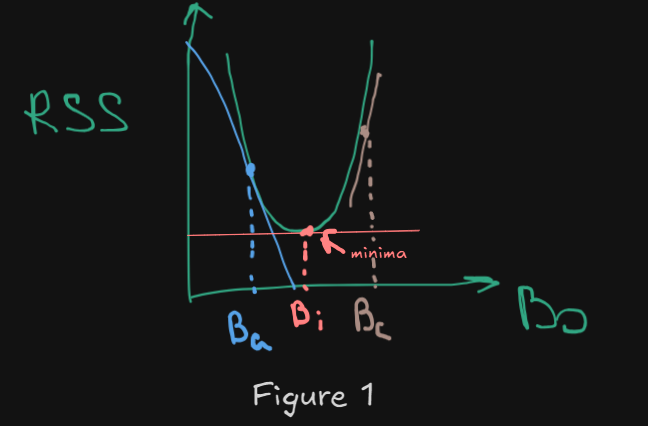

At **Figure 1**, taking derivative of RSS with respect to b0 tells us: with a tiny change of $\beta_{0}$, how RSS will change?
- if we take $\beta_{a}$ as an coefficients - the slope of a tangent line will be negative, which tells us, that RSS is decreasing, but its not minima
- if we take $\beta_{c}$ as a coefficients that reduces RSS - we will get positive slope, which says that RSS is increasing - this is not our goal
- but if we take $\beta_{i}$, we see that the slope at that point is zero and it say TO STOP,
because better result we will never get(if this is global minima)

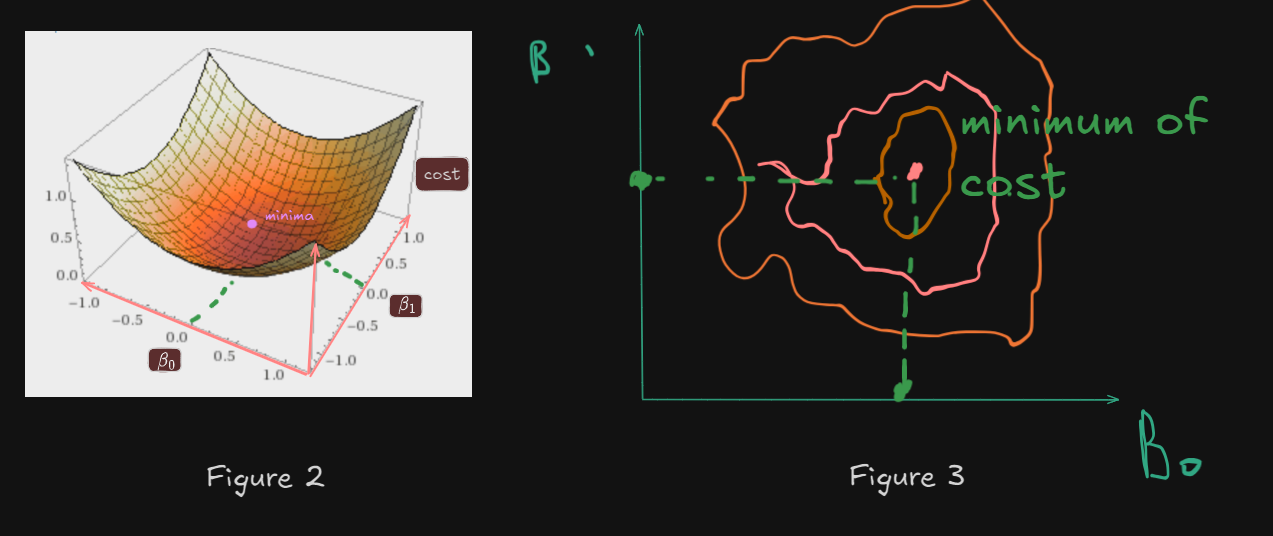

At **Figure 2** and **Figure 3** we can see this in a 3D

So, this images are all great(i hope you liked it) and this words are fantastic, but how actually compute it?
Oh, this is not hard. The algorithm:

#### Step 1: Finding the Direction of Steepest Ascent (The Gradient)

To find the minimum of a function in a multi-dimensional space, we first need to know which way is **"up"** (the steepest increase). This direction is given by the **gradient**.

In higher dimensions, the derivative of a function $L$ with respect to a vector of parameters $\beta$ is called the **gradient**, denoted $\nabla_\beta L(\beta)$. It's a vector containing the partial derivative for each parameter:

$$\nabla_\beta L(\beta) =
\begin{bmatrix}
\frac{\partial L}{\partial\beta_1} \\
\frac{\partial L}{\partial\beta_2} \\
\vdots \\
\frac{\partial L}{\partial\beta_n}
\end{bmatrix}$$

* $L(\beta)$ is the **Cost Function** (or Loss Function), which quantifies how far off our model's predictions are from the true values.
* $\beta$ represents the vector of **Coefficients** (or parameters) we are trying to optimize.

The gradient $\nabla_\beta L(\beta)$ tells us: "For a tiny change in any single parameter $\beta_i$, how much will the cost $L$ be affected?" Crucially, the entire gradient vector points in the direction where the cost function **increases the fastest**.

Since our goal is to find the minimum, we must move in the opposite direction—the direction of the fastest **decrease**. Therefore, we use the **negative gradient**:

$$-\nabla_\beta L(\beta)$$

---

#### Step 2: Evaluating the Current Position

We begin by taking some **initial values** for our parameters, $\beta^{\text{(old)}}$. We then substitute these values into the gradient expression, $\nabla_\beta L(\beta)$.

* If the magnitude of the gradient at this point is **zero** or very close to zero, it means we are at a **local minimum** (or potentially a maximum or saddle point) where the slope is flat.
* If the gradient is **non-zero**, it signals that the function is still sloping, and we need to **"go deeper"** (move further down the cost surface).

---

#### Step 3: Taking a Step Towards the Minimum (The Update Rule)

If we are not yet at a minimum, we need to calculate a new, improved set of parameters, $\beta^{\text{(new)}}$. This is where the core **Gradient Descent Update Rule** comes into play:

$$\beta^{\text{(new)}} = \beta^{\text{(old)}} - \eta \cdot \nabla_\beta L(\beta)$$

This formula dictates how to update the parameters based on the direction of steepest descent. 

Here's a breakdown of the components:

| Term | Name | Role and Significance |
| :---: | :---: | :--- |
| $\beta^{\text{(new)}}$ | **New Parameters** | The updated set of coefficients after taking one optimization step. |
| $\beta^{\text{(old)}}$ | **Old Parameters** | The current coefficients before the update. |
| $\eta$ | **Learning Rate** | A crucial **hyperparameter** that controls the **step size**. A small $\eta$ means slow convergence but potentially better accuracy; a large $\eta$ risks overshooting the minimum. |
| $\nabla_\beta L(\beta)$ | **Gradient Vector** | The direction of **steepest ascent** for the loss function. |
| $-$ | **Subtraction** | Ensures we move in the direction **opposite** to the gradient (the direction of steepest **descent**). |

---
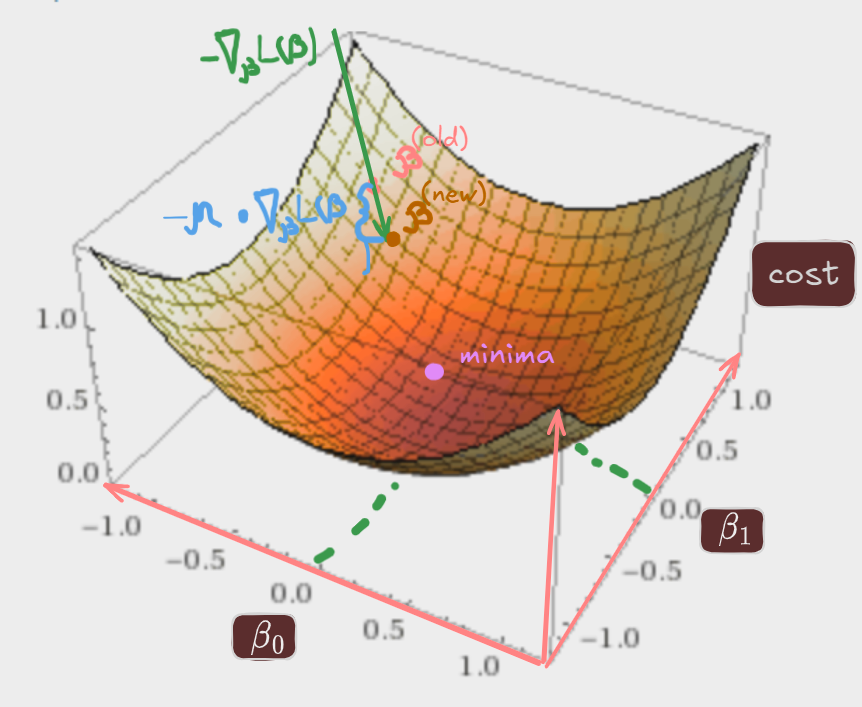
---

#### Step 4: Iteration and Convergence

The process is inherently **iterative**. We treat the new parameters, $\beta^{\text{(new)}}$, as the old parameters for the next iteration.

We **repeat** steps 1 through 3 until a **convergence criterion** is met. This often means:
1.  The magnitude of the gradient is extremely small (approaching zero).
2.  The cost function $L(\beta)$ stops changing significantly between successive steps.
3.  A maximum number of iterations (epochs) has been reached.

By continuously following the negative gradient, we guarantee that with each step, the cost function $L(\beta)$ will decrease (assuming a properly chosen learning rate $\eta$), eventually leading us to the lowest point on the cost surface.

In [7]:
import sympy as sp

In [8]:
X = pd.DataFrame({"x_1": X})
y = pd.DataFrame({"y": y})

In [9]:
def RSS_gradient(X, y):
  n = X.shape[0]
  p = X.shape[1]
  
  b = []
  for i in range(0, p + 1):
    b.append(sp.Symbol(f"b_{i}"))
    
  RSS = sum(
    (float(y.loc[i]) - (b[0] + sum(b[j + 1] * float(X.iloc[i, j]) for j in range(p))))**2 
    for i in range(n)
  )
  
  dRSS_db_i = []
  for b_i in b:
    dRSS_db_i.append(sp.diff(RSS, b_i))
  
  return dRSS_db_i  
    

This code above **symbolically calculates the gradient of the Residual Sum of Squares (RSS) cost function** for a linear regression model.

It uses the `sympy` library to:

1.  Define the linear regression coefficients ($b_0, b_1, \dots$) as **symbols**.
2.  Construct the full RSS equation $\text{RSS}(\mathbf{b})$ using the actual numerical data ($X, y$).
3.  **Differentiate** the symbolic RSS expression with respect to each coefficient $b_i$ to get the gradient vector.

The output is a list of symbolic mathematical expressions for the partial derivatives.

In [10]:
def compute_gradient(grad, b):
  b_dict = {f"b_{i}": b[i] for i in range(len(b))}
  return np.array([float(grad[i].subs(b_dict)) for i in range(0, len(grad))])

This function **calculates the numerical value of the gradient** at a specific point.

It takes the **symbolic gradient expressions** (`grad`) and a list of **current numerical coefficient values** (`b`), substitutes the values into the expressions, and returns the resulting **numerical gradient vector** as a NumPy array. This is the vector needed for the next step of the Gradient Descent algorithm.

In [11]:
def gradient_descent(X, y, steps=1000):
  
  p = X.shape[1]
  
  grad = RSS_gradient(X, y)
  learning_rate = 0.001
  
  b_values = np.full(p+1, 1)
  b_values[0] = 0
  
  computed_gradient = compute_gradient(grad, b_values)
  
  n = 0
  epsilon = 1e-8
  while np.linalg.norm(computed_gradient) > epsilon or n < steps:
    step_size = computed_gradient * learning_rate
    b_values = b_values - step_size
    computed_gradient = compute_gradient(grad, b_values)
    n += 1
  
  return b_values

This function implements the **Gradient Descent algorithm** to **minimize the Residual Sum of Squares (RSS)** for a linear regression model.

It works by:

1.  Getting the **symbolic gradient** (`grad`) once.
2.  **Iteratively** adjusting the coefficients ($\mathbf{b}_{\text{values}}$).
3.  In each step, it calculates the **numerical gradient** at the current $\mathbf{b}$.
4.  It updates $\mathbf{b}$ using the formula: $\mathbf{b}_{\text{new}} = \mathbf{b}_{\text{old}} - \text{learning\_rate} \cdot \nabla_{\mathbf{b}}\text{RSS}(\mathbf{b})$.
5.  The process stops when the change in $\mathbf{b}$ is minimal or the step limit is reached, returning the **optimized coefficients**.

In [12]:
coefs = gradient_descent(X, y)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9484\4037234484.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (float(y.loc[i]) - (b[0] + sum(b[j + 1] * float(X.iloc[i, j]) for j in range(p))))**2


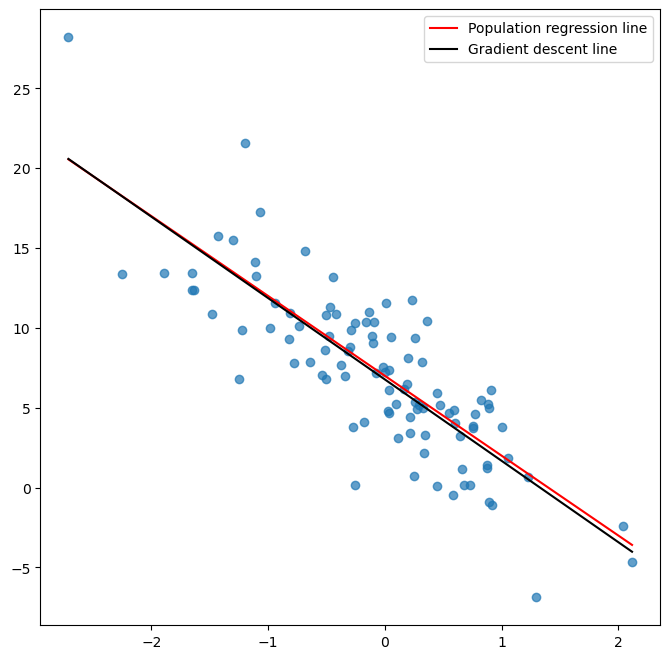

In [13]:
_, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X, y, alpha=0.7)

x_line = np.linspace(X.min(), X.max(), 100)
y_line = b_0 + b_1 * x_line

ax.plot(x_line, y_line, c="r", label="Population regression line")

b_0_hat = coefs[0]
b_1_hat = coefs[1]

x_pred_line = np.linspace(X.min(), X.max(), 100)
y_pred_line = b_0_hat + b_1_hat * x_pred_line

ax.plot(x_pred_line, y_pred_line, c="black", label="Gradient descent line")
ax.legend()

Here we see pretty good results, withot knowing $\beta$!

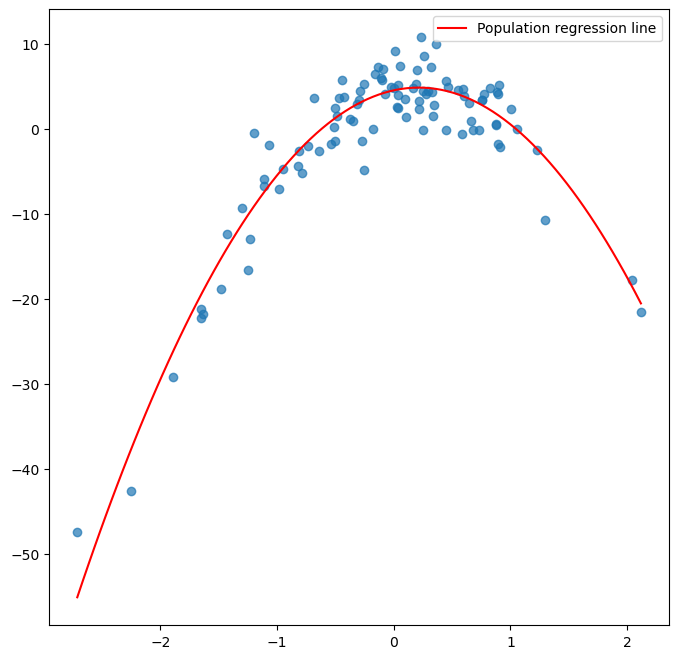

In [14]:
b_0 = 4.5
b_1 = 3
b_2 = -7

y = b_0 + b_1 * X["x_1"] + b_2 * (X["x_1"] ** 2) + eps

_, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X["x_1"], y, alpha=0.7)

x_line = np.linspace(X["x_1"].min(), X["x_1"].max(), 100)
y_line = b_0 + b_1 * x_line + b_2 * x_line**2

ax.plot(x_line, y_line, c="r", label="Population regression line")
ax.legend()


In [15]:
X["x_2"] = X["x_1"]**2

In [16]:
coefs = gradient_descent(X, y)

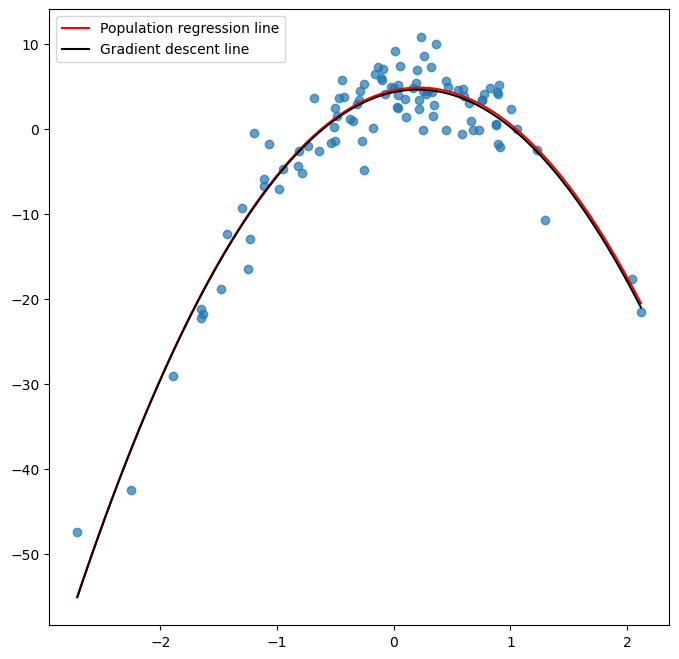

In [17]:
b_0 = 4.5
b_1 = 3
b_2 = -7

y = b_0 + b_1 * X["x_1"] + b_2 * (X["x_1"] ** 2) + eps

_, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X["x_1"], y, alpha=0.7)

x_line = np.linspace(X["x_1"].min(), X["x_1"].max(), 100)
y_line = b_0 + b_1 * x_line + b_2 * x_line**2

ax.plot(x_line, y_line, c="r", label="Population regression line")

y_pred_line = coefs[0] + coefs[1] * x_line + coefs[2] * x_line**2
ax.plot(x_line, y_pred_line, c="black", label="Gradient descent line")

ax.legend()

And finding the parameters of quadratic function also is not hard task for gradient descent

##### Conclusion

Gradient Descent is a fundamental optimization algorithm used to minimize a loss function by iteratively updating model parameters in the direction of the steepest descent of the loss surface.

At each step, the algorithm computes the **gradient** — a vector of partial derivatives that indicates how the loss changes with respect to each parameter — and updates the parameters using a **learning rate**, which controls the step size.

By repeatedly moving *against* the gradient, the algorithm gradually approaches the point where the loss is minimized — ideally, the **global minimum**.

In essence, gradient descent provides a simple yet powerful way for models to **learn** from data by adjusting their parameters to make predictions that best fit the observed outcomes.
